In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import linear_model, preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
df = pd.read_csv('curated-solubility-dataset.csv')
df

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.000000,1,G1,392.510,...,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.000000,1,G1,169.183,...,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.000000,1,G1,140.569,...,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.000000,1,G1,756.226,...,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.000000,1,G1,422.525,...,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,I-84,tetracaine,InChI=1S/C15H24N2O2/c1-4-5-10-16-14-8-6-13(7-9...,GKCBAIGFKIBETG-UHFFFAOYSA-N,C(c1ccc(cc1)NCCCC)(=O)OCCN(C)C,-3.010000,0.000000,1,G1,264.369,...,8.0,106.0,1.0,0.0,0.0,1.0,41.57,115.300645,2.394548e+00,374.236893
9978,I-85,tetracycline,InChI=1S/C22H24N2O8/c1-21(31)8-5-4-6-11(25)12(...,OFVLGDICTFRJMM-WESIUVDSSA-N,OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...,-2.930000,0.000000,1,G1,444.440,...,2.0,170.0,1.0,0.0,3.0,4.0,181.62,182.429237,2.047922e+00,1148.584975
9979,I-86,thymol,InChI=1S/C10H14O/c1-7(2)9-5-4-8(3)6-10(9)11/h4...,MGSRCZKZVOBKFT-UHFFFAOYSA-N,c1(cc(ccc1C(C)C)C)O,-2.190000,0.019222,3,G5,150.221,...,1.0,60.0,1.0,0.0,0.0,1.0,20.23,67.685405,3.092720e+00,251.049732
9980,I-93,verapamil,"InChI=1S/C27H38N2O4/c1-20(2)27(19-28,22-10-12-...",SGTNSNPWRIOYBX-UHFFFAOYSA-N,COc1ccc(CCN(C)CCCC(C#N)(C(C)C)c2ccc(OC)c(OC)c2...,-3.980000,0.000000,1,G1,454.611,...,13.0,180.0,2.0,0.0,0.0,2.0,63.95,198.569223,2.023333e+00,938.203977


In [3]:
df.shape

(9982, 26)

In [4]:
df.size

259532

In [5]:
cols_to_use = ['SMILES', 'Solubility']
df = df[cols_to_use]
df

,SMILES,Solubility
0,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127
1,O=C1Nc2cccc3cccc1c23,-3.254767
2,Clc1ccc(C=O)cc1,-2.177078
3,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409
4,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065
...,...,...
9977,C(c1ccc(cc1)NCCCC)(=O)OCCN(C)C,-3.010000
9978,OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...,-2.930000
9979,c1(cc(ccc1C(C)C)C)O,-2.190000
9980,COc1ccc(CCN(C)CCCC(C#N)(C(C)C)c2ccc(OC)c(OC)c2...,-3.980000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9982 entries, 0 to 9981
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SMILES      9982 non-null   object 
 1   Solubility  9982 non-null   float64
dtypes: float64(1), object(1)
memory usage: 156.1+ KB


In [7]:
df.describe()

,Solubility
count,9982.000000
mean,-2.889909
std,2.368154
min,-13.171900
25%,-4.326325
50%,-2.618173
75%,-1.209735
max,2.137682


In [8]:
df[cols_to_use].nunique()

SMILES        9982
Solubility    7872
dtype: int64

Duplicates Check

In [9]:
df.duplicated().sum()

0

In [10]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [11]:
df.shape

(9982, 2)

Outliers Check

<function matplotlib.pyplot.show(close=None, block=None)>

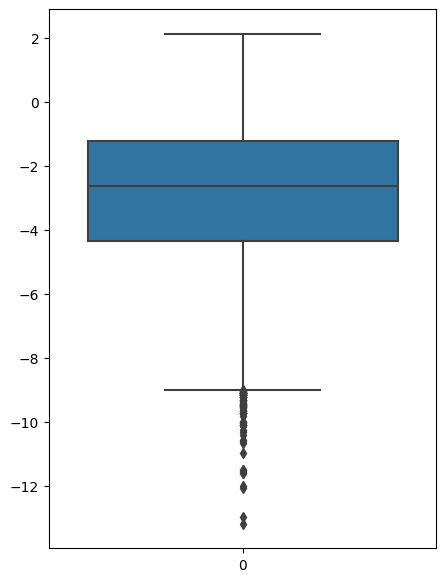

In [12]:
plt.figure(figsize=(5,7))
sns.boxplot(df['Solubility'])
plt.show

Visualising Data

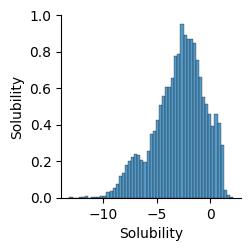

In [13]:
sns.pairplot(df)

Following data too large

In [14]:
#plt.figure(figsize=(10,10))
#sns.lineplot(x='SMILES', y='Solubility', data=df)
#plt.xticks(rotation=90)

ENCODING, deal with mutliple categorical things (NEED GUIDANCE_)

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['SMILES'] = le.fit_transform(df['SMILES'])
df['Solubility'] = le.fit_transform(df['Solubility'])

In [16]:
ohe=pd.get_dummies(df, columns=['SMILES'])
ohe

,Solubility,SMILES_0,SMILES_1,SMILES_2,SMILES_3,SMILES_4,SMILES_5,SMILES_6,SMILES_7,SMILES_8,...,SMILES_9972,SMILES_9973,SMILES_9974,SMILES_9975,SMILES_9976,SMILES_9977,SMILES_9978,SMILES_9979,SMILES_9980,SMILES_9981
0,2785,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3145,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4443,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2523,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1889,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,3419,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9978,3510,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9979,4426,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9980,2465,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
#df.drop other categorical vals we dont need 

Correlation

<Axes: >

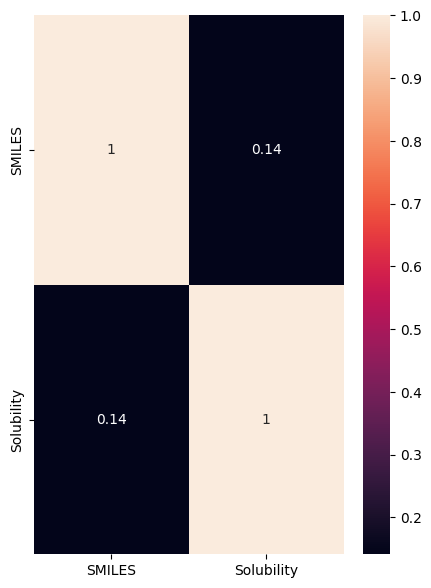

In [18]:
plt.figure(figsize=(5,7))
sns.heatmap(df.corr(), annot=True)

NOW ONTO SOME ML, Train/test/split (TTS)

In [19]:
x=df.drop('SMILES', axis=1)
y=df['SMILES']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
x_train.shape

(7985, 1)

In [22]:
x_test.shape

(1997, 1)

MODELS

SVM

In [23]:
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [24]:
y_pred = svm.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

Random Forests

In [25]:
rfc = RandomForestClassifier(criterion='entropy')
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy')

In [26]:
y_pred = rfc.predict(x_test)
accuracy_score(y_test, y_pred)

0.0

Logistic Regression 

In [27]:
lreg = LogisticRegression()
lreg.fit(x_train, y_train)

LogisticRegression()

In [28]:
y_pred = lreg.predict(x_test)
accuracy_score(y_test, y_pred)

0.0

ADABOOST

In [29]:
ada = AdaBoostClassifier()
ada.fit (x_train, y_train)


AdaBoostClassifier()

In [30]:
y_pred = ada.predict(x_test)
accuracy_score(y_test, y_pred)

0.0

DECISION TREE (MVP?)

In [31]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=0)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=0)

In [32]:
y_pred = dtc.predict(x_test)
accuracy_score(y_test, y_pred)

0.0

In [35]:
scores = cross_val_score(dtc, x, y, cv=5)

ValueError: n_splits=5 cannot be greater than the number of members in each class.

In [36]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

NameError: name 'scores' is not defined

KNN

In [37]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy_score (y_test, y_pred)

0.0